In [1]:
import pandas as pd
import boto3
import io
import numpy as np
import matplotlib.pyplot as plt


# the below extension properly formats a cell after it is run
%load_ext nb_black

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)


# Set the maximum number of columns to 200
pd.set_option("display.max_columns", 200)

<IPython.core.display.Javascript object>

In [2]:
s3R = boto3.resource("s3")
s3 = boto3.client("s3")
bucket_name = "capstonehaystacks"
# Listing the contents of the S3 bucket
for obj in s3R.Bucket(bucket_name).objects.all():
    print(obj.key)

ACSDP5Y2021.DP04-Data.csv
GA_LISTINGS_SALES.csv
GA_LISTINGS_SALES_V2.csv
GA_listing.csv
all_zips_grocery_store.json
all_zips_restaurant.json
atlanta-geo.csv
atlanta_cbsa_zip.csv
atlanta_hdma_2021.csv
atlanta_hdma_census_2021.csv
atlanta_hdma_tract_2021.csv
atlanta_listings.csv
census_data
core_geo_dataset.csv
crime.csv
crime_rating_zipcode.csv
elementary_schools.csv
ga_georgia_zip_codes_geo.min.json
high_schools.csv
hmda_2017_ga_all-records_labels.csv
hmda_2021_ga_all-records_labels.csv
jason_listing.csv
listing-with-poi-distances.csv
listings_with_tract.csv
middle_schools.csv
poi_combined_haystack.csv
poi_combined_haystack_ALL.csv
poi_combined_haystack_ALL_CLEANED.csv
points-of-interest-google.csv
points-of-interest-google2.csv
points-of-interest-google3.csv
points-of-interest-haystacks.csv
schools.csv
zip_summary.csv
zipcodes_111meter.min.json


<IPython.core.display.Javascript object>

In [3]:
file_name = "points-of-interest-google2.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
poi = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [4]:
file_name = "atlanta_cbsa_zip.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
atlanta_zip = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [135]:
file_name = "atlanta_hdma_2021.csv"

file_obj = s3.get_object(Bucket=bucket_name, Key=file_name)
hdma = pd.read_csv(file_obj["Body"])

<IPython.core.display.Javascript object>

In [5]:
zipcode_list = atlanta_zip["census_zcta5_geoid"].tolist()

<IPython.core.display.Javascript object>

In [6]:
poi["primary_category"].value_counts()

Restaurant                      2374
Gas station                     1965
Auto repair shop                1635
Hair salon                      1529
Nail salon                      1318
                                ... 
Patent attorney                    1
Wine wholesaler and importer       1
Bowling club                       1
Dry wall supply store              1
National reserve                   1
Name: primary_category, Length: 2531, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
# removing all poi's that are closed
poi = poi[poi["state"] != "Permanently closed"]


<IPython.core.display.Javascript object>

In [8]:
# checking how many observations have a price
poi["price"].notnull().sum()

16576

<IPython.core.display.Javascript object>

In [9]:
poi[(poi["zip_code"] == 30024) & (poi["primary_category"] == "Korean restaurant")]


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,zip_code,primary_category
13551,Pearl's Gardens,"Pearl's Gardens, 45 Satellite Blvd, Suwanee, G...",0x88f5964c6730b83d:0x2908fb444d29ac20,"Easygoing, strip-mall option featuring traditi...",34.039155,-84.054822,"['Korean restaurant', 'Barbecue restaurant']",4.3,18,NaN,"{'Sunday': '11AM–10PM', 'Monday': 'Closed', 'T...","{'Service options': ['Delivery', 'Takeout', 'D...",Open ⋅ Closes 10PM,"['0x88f5964c3c2592df:0xe8a7fdf48d46c85', '0x88...",https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
16234,Mandoo Restaurant(만두아저씨),"Mandoo Restaurant(만두아저씨), 2700 Lawrenceville-S...",0x88f5963b168f862b:0xf00651fc3ada223a,NaN,34.022000,-84.044869,['Korean restaurant'],4.1,16,NaN,"{'Wednesday': '9:30AM–8:30PM', 'Thursday': '9:...","{'Service options': ['Takeout', 'Delivery'], '...",Open ⋅ Closes 8:30PM,"['0x88f5963b9a473809:0x8bdd1fe21a429cff', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
20454,bb.q Chicken Suwanee,"bb.q Chicken Suwanee, 2850 Lawrenceville-Suwan...",0x88f597dc6f364ec5:0xa24b7f30859cdccf,NaN,34.024953,-84.045703,['Korean restaurant'],4.0,106,NaN,"{'Friday': '11:30AM–11PM', 'Saturday': '11:30A...","{'Service options': ['Delivery', 'Takeout', 'D...",Open ⋅ Closes 11PM,NaN,https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
37103,Gopchang Salon,"Gopchang Salon, 2850 Lawrenceville-Suwanee Rd ...",0x88f5970967dc8345:0x2e81a00cb3528521,NaN,34.024266,-84.044641,['Korean restaurant'],4.6,53,NaN,"{'Sunday': '4–11PM', 'Monday': '4–11PM', 'Tues...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 11PM,NaN,https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
42420,GOP CHANG ON FIRE,"GOP CHANG ON FIRE, 1291 Old Peachtree Rd NW #2...",0x88f5bd5c267deb63:0x43334d10a937659a,NaN,34.005296,-84.083624,['Korean restaurant'],4.5,148,$$,"{'Monday': 'Closed', 'Tuesday': '4PM–12AM', 'W...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 4PM Tue,"['0x88f5a33f53ab9b11:0x8631faf0a1a07031', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
50488,족과의동침 2 스와니,"족과의동침 2 스와니, 1291 Old Peachtree Rd NW #202, Su...",0x88f5bd3b239caf07:0xa016f9717bb31a7e,NaN,34.005060,-84.083411,"['Korean restaurant', 'Restaurant']",4.6,34,NaN,"{'Wednesday': '3–11PM', 'Thursday': '3–11PM', ...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 3PM,NaN,https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
53846,진주가든(Pearls Garden),"진주가든(Pearls Garden), 45 Satellite Blvd, Suwane...",0x88f5964c3c2592df:0xe8a7fdf48d46c85,NaN,34.039139,-84.054710,['Korean restaurant'],4.3,78,$$,"{'Tuesday': '11AM–10PM', 'Wednesday': '11AM–10...","{'Service options': ['Curbside pickup', 'Takeo...",Closed ⋅ Opens 11AM,"['0x88f59638f09ae8e1:0xcbdac5976b3047af', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
60754,SOJU BOX (소주 박스),"SOJU BOX (소주 박스), 1291 Old Peachtree Rd NW #22...",0x88f5bd3191bb4341:0xcd8170a45684a819,NaN,34.005060,-84.083411,['Korean restaurant'],4.8,18,NaN,"{'Friday': '5PM–2AM', 'Saturday': '5PM–2AM', '...","{'Service options': ['Takeout', 'Dine-in'], 'P...",Open ⋅ Closes 2AM,NaN,https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
67162,Manna Korean Restaurant,"Manna Korean Restaurant, 1291 Old Peachtree Rd...",0x88f5bd2a31ea3eed:0xfe2fc1223db7d7c9,NaN,34.005007,-84.084525,['Korean restaurant'],4.5,4,NaN,"{'Sunday': '11AM–9:30PM', 'Monday': '11AM–9:30...","{'Service options': ['Takeout', 'Delivery'], '...",Closed ⋅ Opens 11AM,"['0x88f5a3aab7ba9f53:0x4140edf82046ceff', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
79331,Poetree Cafe,"Poetree Cafe, 45 Old Peachtree Rd NW, Suwanee,...",0x88f59638f09ae8e1:0xcbdac5976b3047af,NaN,34.026480,-84.046322,"['Korean r

<IPython.core.display.Javascript object>

In [10]:
# checking how many poi's in one zip code

poi[poi['zip_code'] == 30024]['primary_category'].value_counts()



Restaurant               31
Nail salon               30
Hair salon               29
Dentist                  27
Auto repair shop         25
                         ..
Photography studio        1
Rehabilitation center     1
Massage school            1
Auto glass shop           1
Greek restaurant          1
Name: primary_category, Length: 458, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
poi["zip_code"].value_counts()

30096    1561
30144    1362
30318    1303
30024    1256
30253    1203
         ... 
30623       3
30111       3
30275       2
30289       2
30250       1
Name: zip_code, Length: 240, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
poi["name"].value_counts()

Subway                                       410
Dollar General                               314
Shell                                        293
Waffle House                                 272
McDonald's                                   252
                                            ... 
Able Self Storage                              1
Mutt and Jeff Porkskins Inc                    1
Vinings Lofts and Apartments                   1
Potato Corner                                  1
Atlanta Convention Center at AmericasMart      1
Name: name, Length: 68325, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# moving zip_code to first colum
poi.insert(0, 'zip_code', poi.pop('zip_code'))


<IPython.core.display.Javascript object>

In [14]:
# dropping columns we wont need
columns_to_drop = ['address', 'gmap_id', 'description', 'hours', 'MISC', 'state', 'relative_results', 'url']
poi.drop(columns=columns_to_drop, inplace=True)


<IPython.core.display.Javascript object>

In [15]:
# dropping the few rows with a missing value in primary category
poi.dropna(subset=['primary_category'], inplace=True)


<IPython.core.display.Javascript object>

In [16]:
poi.isna().sum()

zip_code                0
name                    0
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
price               71872
primary_category        0
dtype: int64

<IPython.core.display.Javascript object>

In [122]:
poi.isna().sum()

zip_code                0
name                    0
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
price               71872
primary_category        0
dtype: int64

<IPython.core.display.Javascript object>

In [127]:
poi.dtypes

zip_code              int64
name                 object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
primary_category     object
dtype: object

<IPython.core.display.Javascript object>

In [129]:
poi["price"].value_counts()

$       8858
$$      6846
$$$      493
₩        141
₩₩       114
$$$$      50
₩₩₩        4
₩₩₩₩       2
Name: price, dtype: int64

<IPython.core.display.Javascript object>

In [130]:
# creating new df without price column
poi2 = poi.drop(columns='price')


<IPython.core.display.Javascript object>

## Looking into census data

In [64]:
file_name = "ACSDP5Y2021.DP04-Data.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
df = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [66]:
# Creating a new colum of zip codes
df["zipcode"] = df["NAME"].str[-5:]

# Dropping all columns that end in "EA", "M", or "MA"
df = df.loc[:, ~df.columns.str.endswith(("EA", "M", "MA"))]

# # Dropping columns we dont need
df = df.drop(columns=["Unnamed: 1146", "NAME"])

# # Setting the first row as the new column names
# df.columns = df.iloc[0]

# # Dropping the first row, which is now redundant
# df = df.drop(0)

# # Renaming the columns
# df = df.rename(
#     columns=lambda x: x.split("!!", 1)[-1].replace("!!", "_") if "!!" in x else x
# )


# # removing the first column
df = df.iloc[:, 1:]

# # moving the last column to the first position and renaming it "zipcode"
df = df.iloc[:, [-1] + list(range(len(df.columns) - 1))]
# df = df.rename(columns={df.columns[0]: "zipcode"})

# # Converting all columns to numeric dtype
# df = df.apply(pd.to_numeric, errors="coerce").fillna(0)


# # # converting all columns to integer dtype
# # df = df.apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)

# # Filtering out rows not in the Atlanta metro area
# df = df[df["zipcode"].isin(zipcode_list)]

# # Resetting index
# df = df.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [67]:
df.shape

(753, 287)

<IPython.core.display.Javascript object>

In [69]:
df = df.drop(df.iloc[:, 6:89], axis=1)

<IPython.core.display.Javascript object>

In [79]:
df.shape

(753, 151)

<IPython.core.display.Javascript object>

In [71]:
df = df.drop(df.iloc[:, 7:51], axis=1)

<IPython.core.display.Javascript object>

In [72]:
df = df.drop(df.iloc[:, 8:17], axis=1)

<IPython.core.display.Javascript object>

In [81]:

columns_to_drop = ["DP04_0004PE", "DP04_0005PE", "DP04_0006PE", "DP04_0007PE", "DP04_0008PE", "DP04_0009PE", "DP04_0010PE", "DP04_0011PE", "DP04_0012PE", "DP04_0013PE", "DP04_0014PE", "DP04_0015PE", "DP04_0016PE", "DP04_0027PE", "DP04_0028PE", "DP04_0029PE", "DP04_0030PE", "DP04_0031PE", "DP04_0032PE", "DP04_0033PE", "DP04_0034PE", "DP04_0035PE", "DP04_0036PE", "DP04_0037PE", "DP04_0038PE", "DP04_0039PE", "DP04_0040PE", "DP04_0041PE", "DP04_0042PE", "DP04_0043PE", "DP04_0044PE", "DP04_0048PE", "DP04_0049PE", "DP04_0057PE", "DP04_0058PE", "DP04_0059PE", "DP04_0060PE", "DP04_0061PE", "DP04_0062PE", "DP04_0063PE", "DP04_0064PE", "DP04_0065PE", "DP04_0066PE", "DP04_0067PE", "DP04_0068PE", "DP04_0069PE", "DP04_0070PE", "DP04_0071PE", "DP04_0072PE", "DP04_0073PE", "DP04_0074PE", "DP04_0075PE", "DP04_0076PE", "DP04_0077PE", "DP04_0078PE", "DP04_0079PE", "DP04_0090PE", "DP04_0091PE", "DP04_0092PE", "DP04_0093PE", "DP04_0094PE", "DP04_0095PE", "DP04_0096PE", "DP04_0097PE", "DP04_0098PE", "DP04_0099PE", "DP04_0100PE", "DP04_0101PE", "DP04_0102PE", "DP04_0103PE", "DP04_0104PE", "DP04_0105PE", "DP04_0106PE", "DP04_0107PE", "DP04_0108PE", "DP04_0109PE", "DP04_0110PE", "DP04_0111PE", "DP04_0112PE", "DP04_0113PE", "DP04_0114PE", "DP04_0115PE", "DP04_0116PE", "DP04_0117PE", "DP04_0118PE", "DP04_0119PE", "DP04_0120PE", "DP04_0121PE", "DP04_0122PE", "DP04_0123PE", "DP04_0124PE", "DP04_0125PE"]

df = df.drop(columns_to_drop, axis=1)



<IPython.core.display.Javascript object>

In [86]:


columns_to_drop = ['DP04_0080PE', 'DP04_0081PE', 'DP04_0082PE', 'DP04_0083PE', 'DP04_0084PE',
                   'DP04_0085PE', 'DP04_0086PE', 'DP04_0087PE', 'DP04_0088PE', 'DP04_0089PE',
                   'DP04_0134PE', 'DP04_0135PE', 'DP04_0143PE']

df = df.drop(columns_to_drop, axis=1)


<IPython.core.display.Javascript object>

In [90]:


columns_to_drop = ['DP04_0017PE', 'DP04_0018PE', 'DP04_0019PE', 'DP04_0020PE', 'DP04_0021PE', 'DP04_0022PE', 'DP04_0023PE', 'DP04_0024PE', 'DP04_0025PE', 'DP04_0026PE']

df = df.drop(columns_to_drop, axis=1)


<IPython.core.display.Javascript object>

In [91]:
df.shape

(753, 36)

<IPython.core.display.Javascript object>

In [97]:
# Iterate over each column name and its corresponding column number
for idx, column_name in enumerate(df.columns):
#     print(f"Column {idx}: {column_name}")
    print(f" {idx}: {df.iloc[0, idx]}")


 0:  Name
 1: Estimate!!HOUSING OCCUPANCY!!Total housing units
 2: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units
 3: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units
 4: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Homeowner vacancy rate
 5: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate
 6: Estimate!!VALUE!!Owner-occupied units!!Median (dollars)
 7: Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)
 8: Percent!!HOUSING OCCUPANCY!!Total housing units
 9: Percent!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units
 10: Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units
 11: Percent!!HOUSING TENURE!!Occupied housing units
 12: Percent!!HOUSING TENURE!!Occupied housing units!!Owner-occupied
 13: Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied
 14: Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units
 15: Percent!!YEAR HOUSEHOLDER MOVED 

<IPython.core.display.Javascript object>

In [116]:
# renaming columns
new_column_names = [
    'zipcode',
    'total_units',
    'occupied_units',
    'vacant_units',
    'homeowner_vacancy_rate',
    'rental_vacancy_rate',
    'median_homeowner_value',
    'median_rental_value',
    'delete',
    'percent_occupied',
    'percent_vacant',
    'delete',
    'percent_owner_occupied',
    'percent_renter_occupied',
    'delete',
    'percent_after_2019',
    'percent_2015_2019',
    'percent_2010_2014',
    'delete',
    'delete',
    'delete',
    'delete',
    'percent_less_500',
    'percent_500_999',
    'percent_1000_1499',
    'percent_1500_1999',
    'percent_2000_2499',
    'percent_2500_2999',
    'percent_more_3000',
    'delete',
    'rent_less_15_percent_income',
    'rent_15_20_percent_income',
    'rent_20_25_percent_income',
    'rent_25_30_percent_income',
    'rent_30_35_percent_income',
    'rent_more_35_percent_income'
]

df2 = df.set_axis(new_column_names, axis=1, inplace=False)


<IPython.core.display.Javascript object>

In [117]:
# deleting all columns named delete
df2 = df2.drop(columns="delete")

<IPython.core.display.Javascript object>

In [118]:
# dropping first row
df2 = df2.drop(index=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [138]:
df2 = df2.apply(pd.to_numeric, errors="coerce")

<IPython.core.display.Javascript object>

In [141]:
df2.isna().sum()

zipcode                          0
total_units                      0
occupied_units                   0
vacant_units                     0
homeowner_vacancy_rate          42
rental_vacancy_rate             47
median_homeowner_value          75
median_rental_value            109
percent_occupied                34
percent_vacant                  34
percent_owner_occupied          36
percent_renter_occupied         36
percent_after_2019              36
percent_2015_2019               36
percent_2010_2014               36
percent_less_500                56
percent_500_999                 56
percent_1000_1499               56
percent_1500_1999               56
percent_2000_2499               56
percent_2500_2999               56
percent_more_3000               56
rent_less_15_percent_income     58
rent_15_20_percent_income       58
rent_20_25_percent_income       58
rent_25_30_percent_income       58
rent_30_35_percent_income       58
rent_more_35_percent_income     58
dtype: int64

<IPython.core.display.Javascript object>

## hdma data

In [143]:
hdma

,zip_code,average_loan_amount_home_improvement_approved,average_loan_amount_home_improvement_denied,average_loan_amount_home_purchase_approved,average_loan_amount_home_purchase_denied,loan_count_home_improvement_approved,loan_count_home_improvement_denied,loan_count_home_purchase_approved,loan_count_home_purchase_denied,total_loan_count,total_approved_loans,total_denied_loans,approval_percentage,zip_median_income,population,zip_owner_occupied_units,total_one_to_four_family_homes,median_age_of_housing_units
0,30002,160100,152390,285173,237129,203,42,624,76,945,827,118,87.51,64488,3129541,549639,936918,44
1,30004,288903,249241,353285,382510,1436,240,4142,339,6157,5578,579,90.60,137621,31727569,8681133,10473381,16
2,30005,294620,233872,304506,335033,862,138,2430,176,3606,3292,314,91.29,166438,16650605,4234171,5065248,15
3,30008,131850,128016,203547,239984,120,42,440,56,658,560,98,85.11,62058,3321318,681648,1038348,35
4,30009,207619,151500,303854,285000,16,7,140,10,173,156,17,90.17,58276,664839,70411,133556,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,31085,118744,122917,205762,186209,60,20,214,25,319,274,45,85.89,66542,831778,239956,381137,22
218,31097,189095,179429,208154,211429,106,24,290,62,482,396,86,82.16,69546,1914752,603689,830453,29
219,31816,199701,202083,158307,126934,29,11,98,31,169,127,42,75.15,53733,513391,144733,235792,30
220,31822,166952,143495,194977,197619,131,53,520,92,796,651,145,81.78,69605,3417396,953667,1561854,32


<IPython.core.display.Javascript object>

In [145]:
# creating zip code list to use as filter
zipcodes = hdma["zip_code"].tolist()

<IPython.core.display.Javascript object>

In [146]:
# filtering by zip codes
df3 = df2[df2["zipcode"].isin(zipcodes)]

<IPython.core.display.Javascript object>

In [148]:
df3.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [154]:
# merging hdma data to df3
df3 = df3.merge(hdma[['zip_code', 'approval_percentage', 'zip_median_income', 'median_age_of_housing_units']], left_on='zipcode', right_on='zip_code', how='left')


<IPython.core.display.Javascript object>

In [162]:
# dropping columns not needed
df3.drop(['total_units', 'occupied_units', 'vacant_units', 'zip_code'], axis=1, inplace=True)


<IPython.core.display.Javascript object>

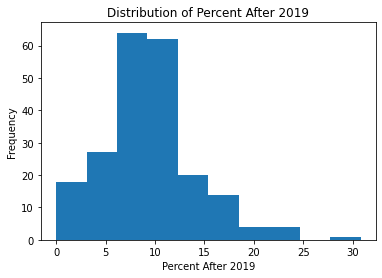

<IPython.core.display.Javascript object>

In [170]:
# looking at distribution to bin
plt.hist(df3["percent_after_2019"], bins=10)
plt.xlabel("Percent After 2019")
plt.ylabel("Frequency")
plt.title("Distribution of Percent After 2019")
plt.show()

In [175]:
# creating new binary columns
df3['new_occupants_0_5_percent'] = np.where((df3['percent_after_2019'] >= 0) & (df3['percent_after_2019'] <= 5), 1, 0)
df3['new_occupants_5_10_percent'] = np.where((df3['percent_after_2019'] > 5) & (df3['percent_after_2019'] <= 10), 1, 0)
df3['new_occupants_10_15_percent'] = np.where((df3['percent_after_2019'] > 10) & (df3['percent_after_2019'] <= 15), 1, 0)
df3['new_occupants_above_15_percent'] = np.where(df3['percent_after_2019'] > 15, 1, 0)



<IPython.core.display.Javascript object>

In [168]:
correlation_matrix = df3.corr()
approval_correlation = correlation_matrix['approval_percentage'].drop('approval_percentage')


<IPython.core.display.Javascript object>

In [166]:
approval_correlation.sort_values(ascending=False)


median_homeowner_value         0.656074
zip_median_income              0.557611
percent_2000_2499              0.408999
median_rental_value            0.390081
percent_2500_2999              0.380334
percent_1500_1999              0.348803
percent_more_3000              0.300137
percent_after_2019             0.295766
percent_2015_2019              0.220250
rent_15_20_percent_income      0.173388
rental_vacancy_rate            0.134998
percent_occupied               0.112801
rent_25_30_percent_income      0.087906
rent_20_25_percent_income      0.069571
percent_owner_occupied         0.062552
rent_less_15_percent_income    0.030787
percent_2010_2014              0.021477
homeowner_vacancy_rate        -0.031188
median_age_of_housing_units   -0.044430
percent_renter_occupied       -0.062552
zipcode                       -0.093147
rent_30_35_percent_income     -0.102157
percent_1000_1499             -0.111558
percent_vacant                -0.112801
percent_less_500              -0.116857


<IPython.core.display.Javascript object>

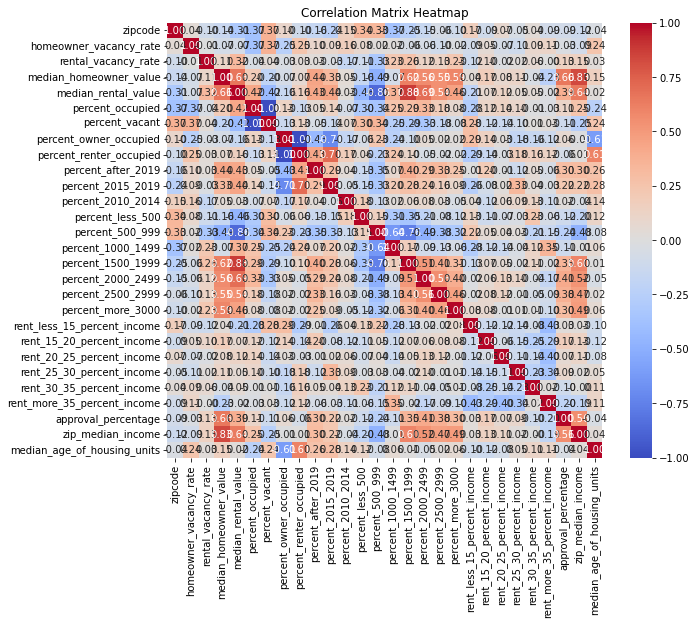

<IPython.core.display.Javascript object>

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
correlation_matrix = df3.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [157]:
# checking if there are any missing zipcodes
all(poi2["zip_code"].isin(zipcodes))

False

<IPython.core.display.Javascript object>

In [159]:
# checking what is the missing zipcode
set(zipcodes) - set(poi2["zip_code"])

{30070}

<IPython.core.display.Javascript object>

In [185]:
# new df that has the primary category appear at least 600 times

poi3 = poi2.groupby('primary_category').filter(lambda x: len(x) >= 600)


<IPython.core.display.Javascript object>

In [188]:
poi3["primary_category"].value_counts()

Restaurant              1980
Gas station             1872
Auto repair shop        1573
Hair salon              1442
Nail salon              1270
Beauty salon            1212
Fast food restaurant    1205
Church                  1114
Park                    1080
Apartment complex        978
Shopping mall            958
Mexican restaurant       863
Barber shop              847
Tire shop                821
Insurance agency         814
Dentist                  814
Cell phone store         791
Grocery store            777
Pizza restaurant         773
Sandwich shop            726
Baptist church           691
Hotel                    677
Corporate office         661
Dollar store             616
Coffee shop              607
Bank                     602
Auto parts store         601
Name: primary_category, dtype: int64

<IPython.core.display.Javascript object>

In [190]:
# creating a new df from poi3 that with feature engineered columns

# storing the counts of primary_category values for each zip code
poi4 = poi3.groupby('zip_code')['primary_category'].value_counts().unstack(fill_value=0)

# adding columnn for count of restaurants with avg_rating >= 4.7
poi4['restaurant_above_4.7'] = poi3[(poi3['primary_category'] == 'Restaurant') & (poi3['avg_rating'] >= 4.7)].groupby('zip_code')['primary_category'].count()

# another for the count of restaurants with avg_rating < 4.7
poi4['restaurant_below_4.7'] = poi3[(poi3['primary_category'] == 'Restaurant') & (poi3['avg_rating'] < 4.7)].groupby('zip_code')['primary_category'].count()

# percentage of restaurants with avg_rating >= 4.7
poi4['restaurant_above_4.7_percentage'] = (poi4['restaurant_above_4.7'] / poi4['Restaurant']) * 100

# Reset the index of the new DataFrame
poi4.reset_index(inplace=True)


<IPython.core.display.Javascript object>

In [194]:
poi4.isna().sum()

primary_category
zip_code                           0
Apartment complex                  0
Auto parts store                   0
Auto repair shop                   0
Bank                               0
Baptist church                     0
Barber shop                        0
Beauty salon                       0
Cell phone store                   0
Church                             0
Coffee shop                        0
Corporate office                   0
Dentist                            0
Dollar store                       0
Fast food restaurant               0
Gas station                        0
Grocery store                      0
Hair salon                         0
Hotel                              0
Insurance agency                   0
Mexican restaurant                 0
Nail salon                         0
Park                               0
Pizza restaurant                   0
Restaurant                         0
Sandwich shop                      0
Shopping mall        

<IPython.core.display.Javascript object>

In [216]:
# creating new df with combined info of df3 and poi4
df4 = df3.merge(poi4, left_on='zipcode', right_on='zip_code')


<IPython.core.display.Javascript object>

In [217]:
df4

,zipcode,homeowner_vacancy_rate,rental_vacancy_rate,median_homeowner_value,median_rental_value,percent_occupied,percent_vacant,percent_owner_occupied,percent_renter_occupied,percent_after_2019,percent_2015_2019,percent_2010_2014,percent_less_500,percent_500_999,percent_1000_1499,percent_1500_1999,percent_2000_2499,percent_2500_2999,percent_more_3000,rent_less_15_percent_income,rent_15_20_percent_income,rent_20_25_percent_income,rent_25_30_percent_income,rent_30_35_percent_income,rent_more_35_percent_income,approval_percentage,zip_median_income,median_age_of_housing_units,new_occupants_0_5_percent,new_occupants_5_10_percent,new_occupants_10_15_percent,new_occupants_above_15_percent,index,zip_code,Apartment complex,Auto parts store,Auto repair shop,Bank,Baptist church,Barber shop,Beauty salon,Cell phone store,Church,Coffee shop,Corporate office,Dentist,Dollar store,Fast food restaurant,Gas station,Grocery store,Hair salon,Hotel,Insurance agency,Mexican restaurant,Nail salon,Park,Pizza restaurant,Restaurant,Sandwich shop,Shopping mall,Tire shop,restaurant_above_4.7,restaurant_below_4.7,restaurant_above_4.7_percentage
0,30002,1.8,7.0,432400.0,933.0,89.2,10.8,56.5,43.5,21.0,26.2,16.8,1.9,70.6,18.2,7.7,0.8,0.0,0.8,12.4,3.2,14.6,5.7,13.5,50.7,87.51,64488,44,0,0,0,1,0,30002,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,2,0,1,0,1,1,1,3,0,1,0,0.0,3.0,0.000000
1,30004,0.3,4.5,444200.0,1478.0,98.1,1.9,76.4,23.6,10.3,37.4,19.6,0.7,7.2,44.8,30.1,10.1,1.3,5.7,9.7,15.2,24.5,13.8,12.2,24.5,90.60,137621,16,0,0,1,0,1,30004,1,3,21,6,3,6,6,6,8,5,8,8,1,9,16,7,10,5,4,9,6,0,10,11,7,8,7,2.0,9.0,18.181818
2,30005,0.8,8.8,464100.0,1712.0,94.7,5.3,71.9,28.1,11.8,32.7,18.5,0.3,0.8,32.0,39.8,19.5,5.5,2.1,17.4,25.8,14.5,5.9,5.8,30.5,91.29,166438,15,0,0,1,0,2,30005,5,1,2,5,0,5,6,1,3,6,17,12,1,3,3,2,4,3,5,8,6,8,7,15,7,3,1,2.0,13.0,13.333333
3,30008,2.4,2.0,200700.0,1195.0,93.8,6.2,60.2,39.8,8.8,31.7,19.6,5.0,27.7,49.7,12.8,4.9,0.0,0.0,7.5,8.9,9.9,10.5,17.3,45.9,85.11,62058,35,0,1,0,0,3,30008,6,2,13,0,0,0,3,2,3,0,0,1,3,2,2,2,1,0,1,4,2,2,2,5,1,1,3,0.0,5.0,0.000000
4,30009,1.3,7.1,456300.0,1764.0,91.4,8.6,63.7,36.3,19.3,36.2,16.7,9.4,1.0,24.8,28.1,13.2,8.7,14.8,14.0,16.9,12.0,16.8,8.5,31.8,90.17,58276,26,0,0,0,1,4,30009,2,5,6,6,2,5,3,2,1,4,9,3,0,4,8,1,11,4,3,2,8,5,5,27,4,2,3,8.0,19.0,29.629630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,31085,3.8,0.0,81800.0,943.0,91.0,9.0,91.3,8.7,1.4,11.6,20.8,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,0.0,96.8,85.89,66542,22,1,0,0,0,231,31085,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000
214,31097,0.7,0.0,146900.0,663.0,78.0,22.0,86.4,13.6,2.5,10.5,17.6,0.0,88.9,2.8,2.8,0.0,0.0,5.6,61.1,0.0,2.8,5.6,8.3,22.2,82.16,69546,29,1,0,0,0,232,31097,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000
215,31816,2.8,0.0,110700.0,833.0,80.2,19.8,58.3,41.7,7.5,21.4,19.7,18.7,69.1,11.0,1.1,0.0,0.0,0.0,16.3,7.7,3.1,7.2,29.5,36.3,75.15,53733,30,0,1,0,0,233,31816,0,1,2,1,4,0,2,0,2,0,0,2,2,2,5,1,0,0,1,1,0,1,1,0,1,1,2,0.0,0.0,0.000000
216,31822,2.4,1.8,165900.0,794.0,84.0,16.0,79.2,20.8,6.6,17.1,21.5,33.2,54.8,8.7,0.0,0.0,3.3,0.0,18.8,20.4,13.9,7.4,6.3,33.3,81.78,69605,32,0,1,0,0,234,31822,0,2,1,1,2,0,2,0,1,0,0,1,2,0,1,1,0,3,0,1,0,3,1,8,1,1,0,2.0,6.0,25.000000


<IPython.core.display.Javascript object>

## Correlation with different variables

In [233]:
# median age correlation

correlation1 = df4.corr()["median_age_of_housing_units"].sort_values(ascending=False)
correlation1

median_age_of_housing_units        1.000000
percent_renter_occupied            0.614493
Apartment complex                  0.415245
percent_2015_2019                  0.301876
new_occupants_above_15_percent     0.280593
percent_after_2019                 0.267361
homeowner_vacancy_rate             0.249841
percent_vacant                     0.243739
Barber shop                        0.205352
restaurant_above_4.7               0.195463
Restaurant                         0.191338
restaurant_below_4.7               0.171504
Beauty salon                       0.157994
percent_2010_2014                  0.155107
median_homeowner_value             0.146944
rent_more_35_percent_income        0.146812
Grocery store                      0.143366
Park                               0.130485
percent_less_500                   0.118853
rent_30_35_percent_income          0.113897
Corporate office                   0.106814
Coffee shop                        0.103376
Baptist church                  

<IPython.core.display.Javascript object>

In [288]:
# approval percentage
df4.corr()['approval_percentage'].sort_values(ascending=False)



approval_percentage                1.000000
median_homeowner_value             0.653251
zip_median_income                  0.556291
percent_2000_2499                  0.407186
median_rental_value                0.390081
percent_2500_2999                  0.379010
percent_1500_1999                  0.356854
Coffee shop                        0.342053
percent_more_3000                  0.298711
percent_after_2019                 0.298156
Park                               0.272867
Dentist                            0.260117
Pizza restaurant                   0.245494
Mexican restaurant                 0.237095
new_occupants_above_15_percent     0.232078
percent_2015_2019                  0.228836
Insurance agency                   0.193955
rent_15_20_percent_income          0.193564
Bank                               0.189104
Shopping mall                      0.178784
Restaurant                         0.173570
restaurant_above_4.7               0.169801
Hair salon                      

<IPython.core.display.Javascript object>

In [224]:
# looking at top correlation between features

# correlation matrix
correlation_matrix = df4.corr()

# upper triangular portion of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# stacking the upper triangle portion into a DataFrame
correlation = upper_triangle.stack().sort_values(ascending=False)

# 10 highest correlated variables
print(correlation.head(10))


zipcode                 zip_code                1.000000
Restaurant              restaurant_below_4.7    0.980478
median_rental_value     percent_1500_1999       0.876248
Hair salon              Nail salon              0.859712
Fast food restaurant    Gas station             0.841191
Beauty salon            Hair salon              0.837589
median_homeowner_value  zip_median_income       0.835088
Auto repair shop        Tire shop               0.827974
Cell phone store        Fast food restaurant    0.824607
Dentist                 Nail salon              0.819768
Bank                    Shopping mall           0.816505
Auto parts store        Gas station             0.815819
Bank                    Dentist                 0.814831
Cell phone store        Nail salon              0.812692
Fast food restaurant    Nail salon              0.804355
Nail salon              Pizza restaurant        0.798981
Bank                    Nail salon              0.798488
Sandwich shop           restaur

<IPython.core.display.Javascript object>

In [226]:
# doing the same for negative corr

# correlation matrix
correlation_matrix = df4.corr()

# lower triangular portion of the correlation matrix
lower_triangle = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))

# stacking the lower triangle portion into a DataFrame
correlation = lower_triangle.stack().sort_values()

# Print the 20 most negatively correlated variables
print(correlation.head(20))


percent_vacant               percent_occupied             -1.000000
percent_renter_occupied      percent_owner_occupied       -1.000000
percent_500_999              median_rental_value          -0.863412
percent_1500_1999            percent_500_999              -0.787903
percent_2015_2019            percent_owner_occupied       -0.705446
Apartment complex            percent_owner_occupied       -0.670017
percent_1000_1499            percent_500_999              -0.626143
median_age_of_housing_units  percent_owner_occupied       -0.614493
new_occupants_0_5_percent    percent_after_2019           -0.609128
Shopping mall                percent_500_999              -0.575756
Hair salon                   percent_500_999              -0.565812
new_occupants_10_15_percent  new_occupants_5_10_percent   -0.547331
Coffee shop                  percent_500_999              -0.535594
Nail salon                   percent_500_999              -0.531748
Bank                         percent_500_999    

<IPython.core.display.Javascript object>

## New dataframe with df3 and poi2 combined

In [239]:


# merging the dataframes based on zip code
merged = pd.merge(poi2, df3[['zipcode', 'rental_vacancy_rate', 'median_homeowner_value', 'median_rental_value',
                             'percent_after_2019', 'rent_more_35_percent_income', 'rent_less_15_percent_income',
                             'approval_percentage', 'zip_median_income', 'median_age_of_housing_units']],
                  left_on='zip_code', right_on='zipcode', how='left')

# dropping the duplicate 'zipcode' column
merged.drop('zipcode', axis=1, inplace=True)



<IPython.core.display.Javascript object>

In [243]:
# looking at highly corr features

# correlation matrix
correlation_matrix = merged.corr()

# triangular portion of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# stacking the upper triangle portion into a DataFrame
correlation = upper_triangle.stack().sort_values(ascending=False)

# 10 highest correlated variables
print(correlation.head(10))


median_homeowner_value  zip_median_income      0.840128
                        median_rental_value    0.702223
                        approval_percentage    0.693646
median_rental_value     zip_median_income      0.666474
approval_percentage     zip_median_income      0.597810
median_rental_value     approval_percentage    0.456060
median_homeowner_value  percent_after_2019     0.397073
latitude                approval_percentage    0.383540
median_rental_value     percent_after_2019     0.352939
percent_after_2019      zip_median_income      0.317443
dtype: float64


<IPython.core.display.Javascript object>

In [245]:
# correlation 
merged.corr()["approval_percentage"].sort_values(ascending=False)

approval_percentage            1.000000
median_homeowner_value         0.693646
zip_median_income              0.597810
median_rental_value            0.456060
latitude                       0.383540
percent_after_2019             0.315498
rent_less_15_percent_income    0.145054
avg_rating                     0.093732
longitude                      0.001817
rental_vacancy_rate           -0.004638
num_of_reviews                -0.005204
median_age_of_housing_units   -0.023925
zip_code                      -0.075438
rent_more_35_percent_income   -0.330258
Name: approval_percentage, dtype: float64

<IPython.core.display.Javascript object>

## Visuals

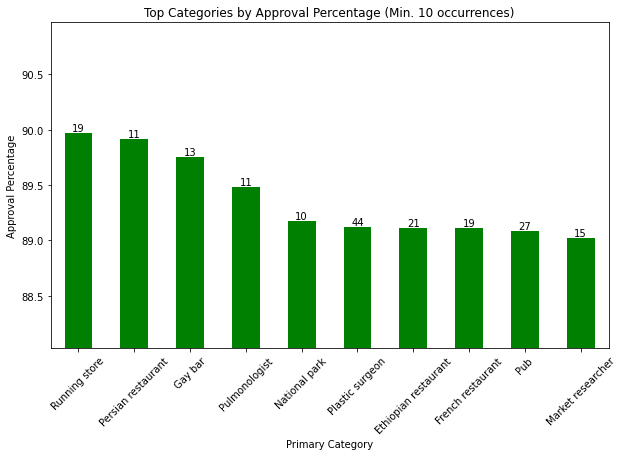

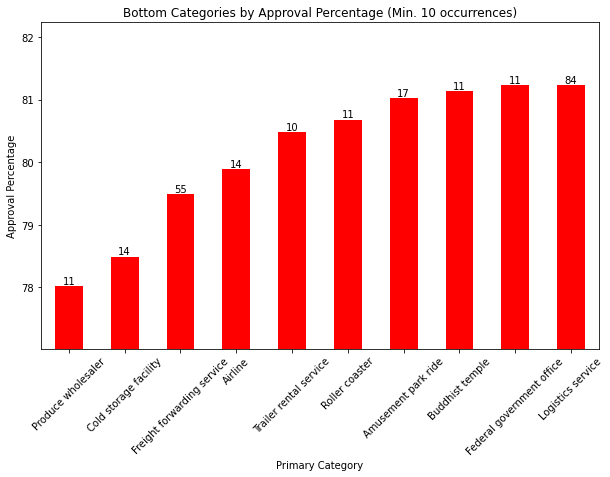

<IPython.core.display.Javascript object>

In [266]:


# occurrences of each primary_category
category_counts = merged['primary_category'].value_counts()

# categories that occur at least 10 times
valid_categories = category_counts[category_counts >= 10]

# filtering based on the valid categories
valid_merged = merged[merged['primary_category'].isin(valid_categories.index)]

# grouping the data by primary_category and calculate the mean approval_percentage
category_approval = valid_merged.groupby('primary_category')['approval_percentage'].mean()

# top 10 categories with the highest mean approval_percentage and their counts
top_categories = category_approval.nlargest(10)
top_categories_counts = valid_categories.loc[top_categories.index]

# bottom 10 categories with the lowest mean approval_percentage and their counts
bottom_categories = category_approval.nsmallest(10)
bottom_categories_counts = valid_categories.loc[bottom_categories.index]

# plotting the chart for the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='green')
plt.xlabel('Primary Category')
plt.ylabel('Approval Percentage')
plt.title('Top Categories by Approval Percentage (Min. 10 occurrences)')
plt.xticks(rotation=45)

# adding count of occurrences on the chart
for i, count in enumerate(top_categories_counts):
    plt.text(i, top_categories[i], f'{count}', ha='center', va='bottom')

plt.ylim(top_categories.min() - 1, top_categories.max() + 1)  # adjusting the y-axis range

plt.show()

# plotting the chart for the bottom categories
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind='bar', color='red')
plt.xlabel('Primary Category')
plt.ylabel('Approval Percentage')
plt.title('Bottom Categories by Approval Percentage (Min. 10 occurrences)')
plt.xticks(rotation=45)

# adding the count of occurrences on the chart
for i, count in enumerate(bottom_categories_counts):
    plt.text(i, bottom_categories[i], f'{count}', ha='center', va='bottom')

plt.ylim(bottom_categories.min() - 1, bottom_categories.max() + 1)  # adjusting the y-axis range

plt.show()


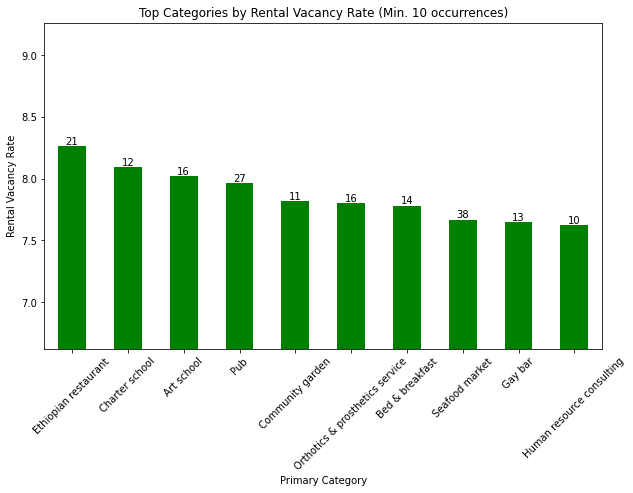

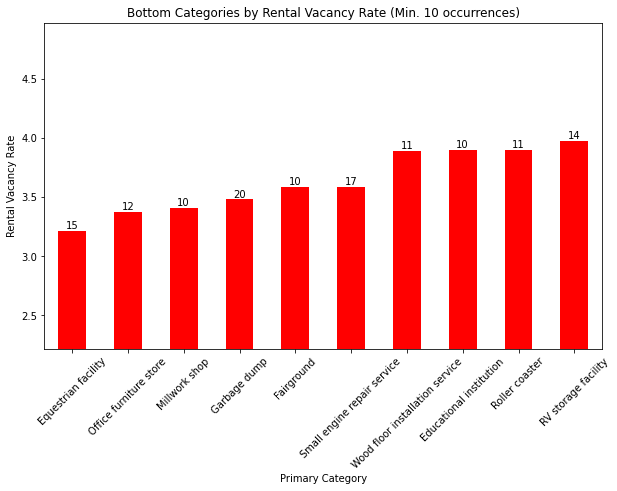

<IPython.core.display.Javascript object>

In [289]:
# occurrences of each primary_category
category_counts = merged["primary_category"].value_counts()

# categories that occur at least 10 times
valid_categories = category_counts[category_counts >= 10]

# filtering based on the valid categories
valid_merged = merged[merged["primary_category"].isin(valid_categories.index)]

# grouping the data by primary_category and calculate the mean approval_percentage
category_approval = valid_merged.groupby("primary_category")[
    "rental_vacancy_rate"
].mean()

# top 10 categories with the highest mean approval_percentage and their counts
top_categories = category_approval.nlargest(10)
top_categories_counts = valid_categories.loc[top_categories.index]

# bottom 10 categories with the lowest mean approval_percentage and their counts
bottom_categories = category_approval.nsmallest(10)
bottom_categories_counts = valid_categories.loc[bottom_categories.index]

# plotting the chart for the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="green")
plt.xlabel("Primary Category")
plt.ylabel("Rental Vacancy Rate")
plt.title("Top Categories by Rental Vacancy Rate (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding count of occurrences on the chart
for i, count in enumerate(top_categories_counts):
    plt.text(i, top_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    top_categories.min() - 1, top_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

# plotting the chart for the bottom categories
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind="bar", color="red")
plt.xlabel("Primary Category")
plt.ylabel("Rental Vacancy Rate")
plt.title("Bottom Categories by Rental Vacancy Rate (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding the count of occurrences on the chart
for i, count in enumerate(bottom_categories_counts):
    plt.text(i, bottom_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    bottom_categories.min() - 1, bottom_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

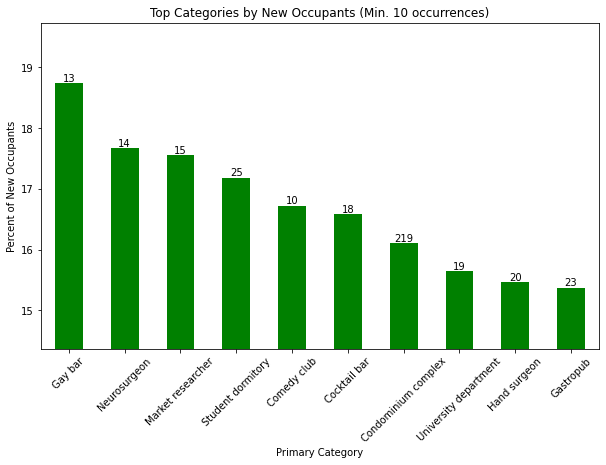

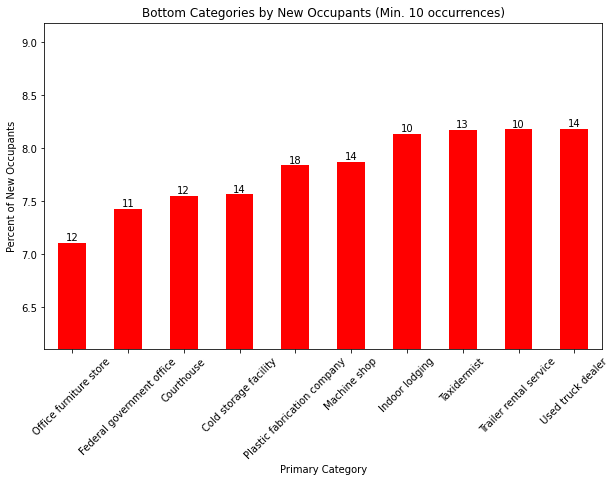

<IPython.core.display.Javascript object>

In [303]:
# occurrences of each primary_category
category_counts = merged["primary_category"].value_counts()

# categories that occur at least 10 times
valid_categories = category_counts[category_counts >= 10]

# filtering based on the valid categories
valid_merged = merged[merged["primary_category"].isin(valid_categories.index)]

# grouping the data by primary_category and calculate the mean approval_percentage
category_approval = valid_merged.groupby("primary_category")[
    "percent_after_2019"
].mean()

# top 10 categories with the highest mean approval_percentage and their counts
top_categories = category_approval.nlargest(10)
top_categories_counts = valid_categories.loc[top_categories.index]

# bottom 10 categories with the lowest mean approval_percentage and their counts
bottom_categories = category_approval.nsmallest(10)
bottom_categories_counts = valid_categories.loc[bottom_categories.index]

# plotting the chart for the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="green")
plt.xlabel("Primary Category")
plt.ylabel("Percent of New Occupants")
plt.title("Top Categories by New Occupants (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding count of occurrences on the chart
for i, count in enumerate(top_categories_counts):
    plt.text(i, top_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    top_categories.min() - 1, top_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

# plotting the chart for the bottom categories
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind="bar", color="red")
plt.xlabel("Primary Category")
plt.ylabel("Percent of New Occupants")
plt.title("Bottom Categories by New Occupants (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding the count of occurrences on the chart
for i, count in enumerate(bottom_categories_counts):
    plt.text(i, bottom_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    bottom_categories.min() - 1, bottom_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

<IPython.core.display.Javascript object>

In [277]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Convert latitude and longitude to radians
merged['latitude_rad'] = merged['latitude'].apply(radians)
merged['longitude_rad'] = merged['longitude'].apply(radians)

# Prepare data for clustering
X = merged[['latitude_rad', 'longitude_rad']].values

# Compute Haversine distance matrix
dist_matrix = haversine_distances(X)

# Set epsilon (maximum distance between samples) to 0.25 miles
epsilon = 0.25 / 3959

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=6, metric='precomputed')
labels = dbscan.fit_predict(dist_matrix)

# Add cluster labels to the dataframe
merged['cluster_label'] = labels

# Filter dataframe to include only clusters with more than one observation
clustered_df = merged[merged['cluster_label'] != -1]

# Identify primary_category values within the same cluster
clustered_categories = clustered_df.groupby('cluster_label')['primary_category'].unique()

# Print the primary_category values within the same cluster
for cluster_label, categories in clustered_categories.items():
    print(f"Cluster {cluster_label}: {', '.join(categories)}")


KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [291]:
df3

,zipcode,homeowner_vacancy_rate,rental_vacancy_rate,median_homeowner_value,median_rental_value,percent_occupied,percent_vacant,percent_owner_occupied,percent_renter_occupied,percent_after_2019,percent_2015_2019,percent_2010_2014,percent_less_500,percent_500_999,percent_1000_1499,percent_1500_1999,percent_2000_2499,percent_2500_2999,percent_more_3000,rent_less_15_percent_income,rent_15_20_percent_income,rent_20_25_percent_income,rent_25_30_percent_income,rent_30_35_percent_income,rent_more_35_percent_income,approval_percentage,zip_median_income,median_age_of_housing_units,new_occupants_0_5_percent,new_occupants_5_10_percent,new_occupants_10_15_percent,new_occupants_above_15_percent
0,30002,1.8,7.0,432400.0,933.0,89.2,10.8,56.5,43.5,21.0,26.2,16.8,1.9,70.6,18.2,7.7,0.8,0.0,0.8,12.4,3.2,14.6,5.7,13.5,50.7,87.51,64488,44,0,0,0,1
1,30004,0.3,4.5,444200.0,1478.0,98.1,1.9,76.4,23.6,10.3,37.4,19.6,0.7,7.2,44.8,30.1,10.1,1.3,5.7,9.7,15.2,24.5,13.8,12.2,24.5,90.60,137621,16,0,0,1,0
2,30005,0.8,8.8,464100.0,1712.0,94.7,5.3,71.9,28.1,11.8,32.7,18.5,0.3,0.8,32.0,39.8,19.5,5.5,2.1,17.4,25.8,14.5,5.9,5.8,30.5,91.29,166438,15,0,0,1,0
3,30008,2.4,2.0,200700.0,1195.0,93.8,6.2,60.2,39.8,8.8,31.7,19.6,5.0,27.7,49.7,12.8,4.9,0.0,0.0,7.5,8.9,9.9,10.5,17.3,45.9,85.11,62058,35,0,1,0,0
4,30009,1.3,7.1,456300.0,1764.0,91.4,8.6,63.7,36.3,19.3,36.2,16.7,9.4,1.0,24.8,28.1,13.2,8.7,14.8,14.0,16.9,12.0,16.8,8.5,31.8,90.17,58276,26,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,31085,3.8,0.0,81800.0,943.0,91.0,9.0,91.3,8.7,1.4,11.6,20.8,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,0.0,96.8,85.89,66542,22,1,0,0,0
218,31097,0.7,0.0,146900.0,663.0,78.0,22.0,86.4,13.6,2.5,10.5,17.6,0.0,88.9,2.8,2.8,0.0,0.0,5.6,61.1,0.0,2.8,5.6,8.3,22.2,82.16,69546,29,1,0,0,0
219,31816,2.8,0.0,110700.0,833.0,80.2,19.8,58.3,41.7,7.5,21.4,19.7,18.7,69.1,11.0,1.1,0.0,0.0,0.0,16.3,7.7,3.1,7.2,29.5,36.3,75.15,53733,30,0,1,0,0
220,31822,2.4,1.8,165900.0,794.0,84.0,16.0,79.2,20.8,6.6,17.1,21.5,33.2,54.8,8.7,0.0,0.0,3.3,0.0,18.8,20.4,13.9,7.4,6.3,33.3,81.78,69605,32,0,1,0,0


<IPython.core.display.Javascript object>

In [292]:
df4

,zipcode,homeowner_vacancy_rate,rental_vacancy_rate,median_homeowner_value,median_rental_value,percent_occupied,percent_vacant,percent_owner_occupied,percent_renter_occupied,percent_after_2019,percent_2015_2019,percent_2010_2014,percent_less_500,percent_500_999,percent_1000_1499,percent_1500_1999,percent_2000_2499,percent_2500_2999,percent_more_3000,rent_less_15_percent_income,rent_15_20_percent_income,rent_20_25_percent_income,rent_25_30_percent_income,rent_30_35_percent_income,rent_more_35_percent_income,approval_percentage,zip_median_income,median_age_of_housing_units,new_occupants_0_5_percent,new_occupants_5_10_percent,new_occupants_10_15_percent,new_occupants_above_15_percent,index,zip_code,Apartment complex,Auto parts store,Auto repair shop,Bank,Baptist church,Barber shop,Beauty salon,Cell phone store,Church,Coffee shop,Corporate office,Dentist,Dollar store,Fast food restaurant,Gas station,Grocery store,Hair salon,Hotel,Insurance agency,Mexican restaurant,Nail salon,Park,Pizza restaurant,Restaurant,Sandwich shop,Shopping mall,Tire shop,restaurant_above_4.7,restaurant_below_4.7,restaurant_above_4.7_percentage
0,30002,1.8,7.0,432400.0,933.0,89.2,10.8,56.5,43.5,21.0,26.2,16.8,1.9,70.6,18.2,7.7,0.8,0.0,0.8,12.4,3.2,14.6,5.7,13.5,50.7,87.51,64488,44,0,0,0,1,0,30002,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,2,0,1,0,1,1,1,3,0,1,0,0.0,3.0,0.000000
1,30004,0.3,4.5,444200.0,1478.0,98.1,1.9,76.4,23.6,10.3,37.4,19.6,0.7,7.2,44.8,30.1,10.1,1.3,5.7,9.7,15.2,24.5,13.8,12.2,24.5,90.60,137621,16,0,0,1,0,1,30004,1,3,21,6,3,6,6,6,8,5,8,8,1,9,16,7,10,5,4,9,6,0,10,11,7,8,7,2.0,9.0,18.181818
2,30005,0.8,8.8,464100.0,1712.0,94.7,5.3,71.9,28.1,11.8,32.7,18.5,0.3,0.8,32.0,39.8,19.5,5.5,2.1,17.4,25.8,14.5,5.9,5.8,30.5,91.29,166438,15,0,0,1,0,2,30005,5,1,2,5,0,5,6,1,3,6,17,12,1,3,3,2,4,3,5,8,6,8,7,15,7,3,1,2.0,13.0,13.333333
3,30008,2.4,2.0,200700.0,1195.0,93.8,6.2,60.2,39.8,8.8,31.7,19.6,5.0,27.7,49.7,12.8,4.9,0.0,0.0,7.5,8.9,9.9,10.5,17.3,45.9,85.11,62058,35,0,1,0,0,3,30008,6,2,13,0,0,0,3,2,3,0,0,1,3,2,2,2,1,0,1,4,2,2,2,5,1,1,3,0.0,5.0,0.000000
4,30009,1.3,7.1,456300.0,1764.0,91.4,8.6,63.7,36.3,19.3,36.2,16.7,9.4,1.0,24.8,28.1,13.2,8.7,14.8,14.0,16.9,12.0,16.8,8.5,31.8,90.17,58276,26,0,0,0,1,4,30009,2,5,6,6,2,5,3,2,1,4,9,3,0,4,8,1,11,4,3,2,8,5,5,27,4,2,3,8.0,19.0,29.629630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,31085,3.8,0.0,81800.0,943.0,91.0,9.0,91.3,8.7,1.4,11.6,20.8,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,0.0,96.8,85.89,66542,22,1,0,0,0,231,31085,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000
214,31097,0.7,0.0,146900.0,663.0,78.0,22.0,86.4,13.6,2.5,10.5,17.6,0.0,88.9,2.8,2.8,0.0,0.0,5.6,61.1,0.0,2.8,5.6,8.3,22.2,82.16,69546,29,1,0,0,0,232,31097,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000
215,31816,2.8,0.0,110700.0,833.0,80.2,19.8,58.3,41.7,7.5,21.4,19.7,18.7,69.1,11.0,1.1,0.0,0.0,0.0,16.3,7.7,3.1,7.2,29.5,36.3,75.15,53733,30,0,1,0,0,233,31816,0,1,2,1,4,0,2,0,2,0,0,2,2,2,5,1,0,0,1,1,0,1,1,0,1,1,2,0.0,0.0,0.000000
216,31822,2.4,1.8,165900.0,794.0,84.0,16.0,79.2,20.8,6.6,17.1,21.5,33.2,54.8,8.7,0.0,0.0,3.3,0.0,18.8,20.4,13.9,7.4,6.3,33.3,81.78,69605,32,0,1,0,0,234,31822,0,2,1,1,2,0,2,0,1,0,0,1,2,0,1,1,0,3,0,1,0,3,1,8,1,1,0,2.0,6.0,25.000000


<IPython.core.display.Javascript object>

In [298]:
merged_df

,zipcode,total_units,occupied_units,vacant_units,homeowner_vacancy_rate,rental_vacancy_rate,median_homeowner_value,median_rental_value,percent_occupied,percent_vacant,percent_owner_occupied,percent_renter_occupied,percent_after_2019,percent_2015_2019,percent_2010_2014,percent_less_500,percent_500_999,percent_1000_1499,percent_1500_1999,percent_2000_2499,percent_2500_2999,percent_more_3000,rent_less_15_percent_income,rent_15_20_percent_income,rent_20_25_percent_income,rent_25_30_percent_income,rent_30_35_percent_income,rent_more_35_percent_income,zip_code,approval_percentage,zip_median_income,median_age_of_housing_units
0,30002,3149,2810,339,1.8,7.0,432400.0,933.0,89.2,10.8,56.5,43.5,21.0,26.2,16.8,1.9,70.6,18.2,7.7,0.8,0.0,0.8,12.4,3.2,14.6,5.7,13.5,50.7,30002,87.51,64488,44
1,30004,24391,23933,458,0.3,4.5,444200.0,1478.0,98.1,1.9,76.4,23.6,10.3,37.4,19.6,0.7,7.2,44.8,30.1,10.1,1.3,5.7,9.7,15.2,24.5,13.8,12.2,24.5,30004,90.60,137621,16
2,30005,14248,13498,750,0.8,8.8,464100.0,1712.0,94.7,5.3,71.9,28.1,11.8,32.7,18.5,0.3,0.8,32.0,39.8,19.5,5.5,2.1,17.4,25.8,14.5,5.9,5.8,30.5,30005,91.29,166438,15
3,30008,12420,11648,772,2.4,2.0,200700.0,1195.0,93.8,6.2,60.2,39.8,8.8,31.7,19.6,5.0,27.7,49.7,12.8,4.9,0.0,0.0,7.5,8.9,9.9,10.5,17.3,45.9,30008,85.11,62058,35
4,30009,8278,7563,715,1.3,7.1,456300.0,1764.0,91.4,8.6,63.7,36.3,19.3,36.2,16.7,9.4,1.0,24.8,28.1,13.2,8.7,14.8,14.0,16.9,12.0,16.8,8.5,31.8,30009,90.17,58276,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,31085,455,414,41,3.8,0.0,81800.0,943.0,91.0,9.0,91.3,8.7,1.4,11.6,20.8,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,0.0,96.8,31085,85.89,66542,22
218,31097,613,478,135,0.7,0.0,146900.0,663.0,78.0,22.0,86.4,13.6,2.5,10.5,17.6,0.0,88.9,2.8,2.8,0.0,0.0,5.6,61.1,0.0,2.8,5.6,8.3,22.2,31097,82.16,69546,29
219,31816,2577,2066,511,2.8,0.0,110700.0,833.0,80.2,19.8,58.3,41.7,7.5,21.4,19.7,18.7,69.1,11.0,1.1,0.0,0.0,0.0,16.3,7.7,3.1,7.2,29.5,36.3,31816,75.15,53733,30
220,31822,2756,2316,440,2.4,1.8,165900.0,794.0,84.0,16.0,79.2,20.8,6.6,17.1,21.5,33.2,54.8,8.7,0.0,0.0,3.3,0.0,18.8,20.4,13.9,7.4,6.3,33.3,31822,81.78,69605,32


<IPython.core.display.Javascript object>

In [299]:
merged

,zip_code,name,latitude,longitude,category,avg_rating,num_of_reviews,primary_category,rental_vacancy_rate,median_homeowner_value,median_rental_value,percent_after_2019,rent_more_35_percent_income,rent_less_15_percent_income,approval_percentage,zip_median_income,median_age_of_housing_units,latitude_rad,longitude_rad
0,30263,H&R Block,33.374876,-84.762020,"['Tax preparation service', 'Tax consultant']",4.8,58,Tax preparation service,3.6,199400.0,1139.0,8.0,45.3,9.0,86.48,98524.0,21.0,0.582501,-1.479376
1,30096,Gwinnett Community Bank,34.007883,-84.133413,"['Bank', 'ATM']",3.0,2,Bank,3.6,255700.0,1464.0,16.9,44.7,8.4,84.33,77316.0,24.0,0.593550,-1.468405
2,30096,Corley Insurance Inc,34.006241,-84.136169,"['Insurance agency', 'Auto insurance agency', ...",4.1,8,Insurance agency,3.6,255700.0,1464.0,16.9,44.7,8.4,84.33,77316.0,24.0,0.593521,-1.468453
3,30096,Kenn's Duluth Lock & Key,33.998140,-84.144132,['Locksmith'],4.9,26,Locksmith,3.6,255700.0,1464.0,16.9,44.7,8.4,84.33,77316.0,24.0,0.593379,-1.468592
4,30071,rangel services,33.936178,-84.202939,['Construction company'],4.4,6,Construction company,3.6,241800.0,1266.0,7.2,50.4,7.9,87.29,128921.0,25.0,0.592298,-1.469619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88375,30253,Tru by Hilton McDonough,33.424166,-84.179083,['Hotel'],4.4,538,Hotel,5.1,206700.0,1272.0,11.4,41.4,8.9,81.93,79060.0,20.0,0.583362,-1.469202
88376,30328,Abernathy Square,33.935668,-84.377087,['Shopping mall'],4.3,1134,Shopping mall,7.1,451900.0,1677.0,15.6,33.0,16.7,89.83,188402.0,37.0,0.592289,-1.472658
88377,30328,Courtyard by Marriott Atlanta Perimeter Center,33.925575,-84.353722,"['Hotel', 'Indoor lodging', 'Meeting planning ...",4.1,518,Hotel,7.1,451900.0,1677.0,15.6,33.0,16.7,89.83,188402.0,37.0,0.592113,-1.472250
88378,30303,Atlanta Convention Center at AmericasMart,33.760253,-84.388293,['Convention center'],4.4,98,Convention center,6.0,188900.0,1395.0,3.9,57.8,10.0,81.43,62703.0,44.0,0.589228,-1.472854


<IPython.core.display.Javascript object>

In [259]:
# range of approval_percentage
approval_min = merged['approval_percentage'].min()
approval_max = merged['approval_percentage'].max()

# printing the range
print(f"Range of approval_percentage: {approval_min} to {approval_max}")


Range of approval_percentage: 71.43 to 94.01


<IPython.core.display.Javascript object>

In [265]:
# # looking at produce wholesaler observations
merged[merged['primary_category'] == 'Produce wholesaler']



,zip_code,name,latitude,longitude,category,avg_rating,num_of_reviews,primary_category,rental_vacancy_rate,median_homeowner_value,median_rental_value,percent_after_2019,rent_more_35_percent_income,rent_less_15_percent_income,approval_percentage,zip_median_income,median_age_of_housing_units
7520,30297,Global Produce Ga,33.626828,-84.394075,['Produce wholesaler'],4.0,1,Produce wholesaler,6.0,81200.0,946.0,13.6,40.0,12.1,75.71,55406.0,40.0
12140,30297,Coosemans Atlanta Inc,33.621093,-84.391712,['Produce wholesaler'],4.3,18,Produce wholesaler,6.0,81200.0,946.0,13.6,40.0,12.1,75.71,55406.0,40.0
12970,30297,Phoenix Wholesale Foodservice,33.622233,-84.394864,['Produce wholesaler'],3.9,18,Produce wholesaler,6.0,81200.0,946.0,13.6,40.0,12.1,75.71,55406.0,40.0
34689,30534,Gold Creek Foods LLC,34.423539,-84.107366,['Produce wholesaler'],3.1,57,Produce wholesaler,8.8,250300.0,1188.0,11.3,33.0,17.3,88.93,87203.0,16.0
44991,30354,Mission Produce Inc,33.657576,-84.372661,['Produce wholesaler'],4.5,28,Produce wholesaler,4.8,162500.0,1079.0,11.0,45.0,12.4,78.14,59680.0,50.0
50051,30297,Nickey Gregory Company,33.620947,-84.392284,['Produce wholesaler'],3.9,48,Produce wholesaler,6.0,81200.0,946.0,13.6,40.0,12.1,75.71,55406.0,40.0
52335,30297,Fidelity Fruit & Produce Co,33.620292,-84.390560,['Produce wholesaler'],4.8,6,Produce wholesaler,6.0,81200.0,946.0,13.6,40.0,12.1,75.71,55406.0,40.0
59412,30349,EarthFresh LLC,33.611507,-84.512489,['Produce wholesaler'],4.0,6,Produce wholesaler,10.7,165500.0,1108.0,14.0,47.1,10.9,73.34,61220.0,36.0
62534,30213,FreshPoint Atlanta,33.541694,-84.583793,"['Produce wholesaler', 'Dairy supplier', 'Deli...",3.3,96,Produce wholesaler,0.0,201900.0,1524.0,10.1,36.4,6.0,81.71,118266.0,20.0
72608,30288,General Produce LLC,33.637810,-84.318863,['Produce wholesaler'],3.4,65,Produce wholesaler,0.0,162100.0,959.0,2.9,55.6,17.2,71.43,63989.0,26.0


<IPython.core.display.Javascript object>

In [300]:
merged.to_csv('poi_expanded.csv', index=False)


<IPython.core.display.Javascript object>

In [302]:
df4.to_csv("zipcode_expanded", index=False)

<IPython.core.display.Javascript object>

In [283]:

# Convert the poi_df DataFrame to a csv buffer in memory
csv_buffer = io.StringIO()
poi.to_csv(csv_buffer, index=False)

# Naming the file for AWS storage
file_name = "points-of-interest-google3.csv"

# Uploading the file to S3 and printing the response
response = s3R.Object(bucket_name, file_name).put(Body=csv_buffer.getvalue())
print(f"File uploaded to S3 with ETag: {response['ETag']}")  

File uploaded to S3 with ETag: "b7a6a7cab74757b8f40fb414247a2bf6"


<IPython.core.display.Javascript object>

In [284]:
# Convert the poi_df DataFrame to a csv buffer in memory
csv_buffer = io.StringIO()
df.to_csv(csv_buffer, index=False)

# Naming the file for AWS storage
file_name = "census_data"

# Uploading the file to S3 and printing the response
response = s3R.Object(bucket_name, file_name).put(Body=csv_buffer.getvalue())
print(f"File uploaded to S3 with ETag: {response['ETag']}")  # C

File uploaded to S3 with ETag: "2e42cc9a1a54d627e3f3ea5c0454f3aa"


<IPython.core.display.Javascript object>